In [ ]:
# Mounting Google Drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Single Cell Images

Ariel Lubonja (alubonj1@jh.edu), Sean Yanik (syanik1@jhmi.edu)

RBC_single1.jpg
This is what the data (one image bcs. I cannot get more to print) looks like


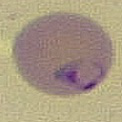

In [ ]:
# # Suppose you have a directory called documents that contains Wikipedia articles, you can process these as follows:
# # Cleaning the data (e.g. removing stop words) is not required.
import os
# from collections import defaultdict

# files = [f for f in os.listdir('documents') if os.path.isfile(os.path.join('documents', f))
# X = defaultdict(list)
# for i, file in enumerate(files[:len(files)], start=1):
#     with open(os.path.join('documents', file)) as f:
#         X['doc_' + str(i)] = f.readlines()
# # X is a dictinary that maps doc_id to text.

img_path = r"/content/drive/MyDrive/RBC_images/single_RBCs/SIngle_RBC_images_all_resized/single_RBC_images_2/single_RBC_images"

# # Suppose you have labels that are stored in a CSV file:
import pandas as pd

# The labels are 1 directory up bcs. the image folder needs to contain only images
y = pd.read_csv('/content/drive/MyDrive/RBC_images/single_RBCs/SIngle_RBC_images_all_resized/Parasite_labeling_2.11.22.csv')
# # y is a Pandas dataframe that contains each label.

# Suppose you have a directory called images that contains pictures of cats, you can process them as follows:
from PIL import Image


images = [f for f in os.listdir(img_path) if os.path.isfile(os.path.join(img_path, f))]
print(images[0])
X = [Image.open(img_path + "/" + image) for image in images]
# X is a list of PIL Image objects

print("This is what the data (one image bcs. I cannot get more to print) looks like")
X[20]


#######################################################
# TODO: Read in your raw data
# X = 
# y = 
#######################################################

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            896 non-null    object
 1   infected (Y/N)  896 non-null    object
dtypes: object(2)
memory usage: 14.1+ KB


In [ ]:
# Change Y/N to True/False
mapper = {'Y': True, 'N': False}
# TODO dropping all the rest of the CSV, may need later
y = y['infected (Y/N)'].map(mapper)
label_df = y.copy()
y

0      False
1       True
2       True
3      False
4       True
       ...  
891    False
892    False
893    False
894    False
895    False
Name: infected (Y/N), Length: 896, dtype: bool

Now, let's print a few examples. Depending on your data format, you may have to write this yourself. We have provided some examples below.

image:
label: False
image:
label: True
image:
label: True
image:
label: False
image:
label: True
Not sure why the images aren't showing using the provided code. Here's an image shown manually


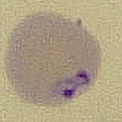

In [ ]:
# # If your data is stored in an array:
# print('X:', X[:5])
# print('y:', y[:5])

# # If your data consists of image files:
from PIL import Image

for i in range(5):
    print('image:')
    img = X[i]
    img.show()
    print('label:', y[i])

print("Not sure why the images aren't showing using the provided code. Here's an image shown manually")
original_images = X.copy() # Keep a copy of the original images for future plotting
X[14]

#######################################################
# TODO: print out what a few examples of your raw data.

#######################################################

In [ ]:
# # If you're using text data stored in a dictionary (like example above):
# # Suppose each document is a string that contains a period
# # and are trying to predict end of sentences (EOS),
# import re
# import pandas as pd
# from collections import defaultdict

from PIL import ImageOps
import numpy as np
# We believe grayscale images will be easier for the model to use
grayscale_X = [ImageOps.grayscale(i) for i in X]

# Some preprocessing
gray_X_data = [list(i.getdata()) for i in grayscale_X]
print("Image as grayscale values (only first 10/14k pixels)")
print(gray_X_data[0][0:10])
np_X = np.array([np.array(i) for i in gray_X_data])

# # Convert X from doc_id -> text to doc_id -> {sentence, features}
# X = {k:{'sentence': v, 'features': None} for k,v in X.items()}

# # suppose you downloaded these external data: common abbreviations, titles (e.g. mr, ms, dr), month abbreviations (e.g. sept, oct)
# abbrevs = pd.read_csv('common_abbrevs.csv')
# titles = pd.read_csv('titles.csv')
# months = pd.read_csv('month_abbrevs.csv')

# # for the purpose of this example, assume all documents have len > 3
# features = defaultdict(int)
# for doc_id, doc in X.items():
#     idx = re.find('.')
#     one_before = doc['sentence'][idx - 1] if idx > 0 else None
#     one_after = doc['sentence'][idx + 1] if idx < len(doc['sentence']) - 1 else None
#     features['is_abbrev'] = 1 if one_before and one_before in abbrevs else 0
#     features['is_title'] = 1 if one_before and one_before in titles else 0
#     features['is_month'] = 1 if one_before and one_before in months else 0
#     features['is_decimal'] = 1 if one_before and one_after in one_before.isdigit() and one_after.isdigit() else 0
#     features['other_punc'] = 1 if any((p in '?!.') for c in doc['sentence'][idx:]) else 0
#     features['period_loc'] = idx
#     X[doc_id]['features'] = features
# # In just a few lines of Python, we created 6 features!


#######################################################
# TODO: compute features for each example
x_df = pd.DataFrame(np_X)
x_df["median"] = x_df.median(axis=0)
x_df["3rd_q"] = x_df.quantile(.75, axis=0)
x_df["var"] = x_df.var(axis=0)
x_df[["median", "3rd_q", "var"]].head()
#######################################################

Image as grayscale values (only first 10/14k pixels)
[181, 179, 175, 165, 167, 172, 177, 174, 176, 172]


median   3rd_q         var
0   184.0  190.00  185.783554
1   184.0  190.00  181.630786
2   183.0  190.00  177.467274
3   183.0  189.25  172.695207
4   184.0  190.00  159.279578

In [ ]:
import numpy as np

np.unique(y)

array([False,  True])

In [ ]:
np.unique([len(list(grayscale_X[i].getdata())) for i in range(len(grayscale_X))])

array([14884])

In [ ]:
np.array(gray_X_data[0]).shape

(14884,)

In [ ]:
# # Now, using your numerical features from the previous step, you can construct the dataset.
# # Depending on what your raw data was (i.e. if any field was numerical), you may include this in the final dataset
# # or you may just use the features you created. 

# # Using the dictionary from above (doc_id -> {sentence, features}) the dataset can be constructed
# import numpy as np

# X = np.array([np.array(doc.features.values()) for doc in X.values()])
# y = np.array(y) # assume y was a list of binary labels previously

#######################################################
# TODO: Convert X and y to numpy arrays with appropriate dimensions
X = x_df.to_numpy() # Did all this in the cells above. Now all images are a flat vector of 122x122 = 14884 px. grayscale
y = y
#######################################################

In [ ]:
x_df.to_numpy().shape

(896, 14887)

If you have a classification dataset, let's look at class balance. This tells us how many examples we have for each label.

In [ ]:
for i in np.unique(y):
    print(f'{len(y[y==i])} examples of class {i}')

679 examples of class False
217 examples of class True


In [ ]:
#######################################################
print(f'Number of examples: {X.shape[0]}')
print(f'Number of features per example: {X.shape[1]}')
# there are many more that are relevant to the specific domain your data is in.
# TODO: if applicable, please include any additional dataset statistics here
#######################################################

Number of examples: 896
Number of features per example: 14887


In [ ]:
print(X[0])

[181.         179.         175.         ... 184.         190.
 185.78355447]


This is the histogram of grayscale values of cell with y= False


(array([  46.,  903., 3967., 2370.,  718.,  646., 2114., 3207.,  855.,
          61.]),
 array([107. , 116.3, 125.6, 134.9, 144.2, 153.5, 162.8, 172.1, 181.4,
        190.7, 200. ]),
 <a list of 10 Patch objects>)

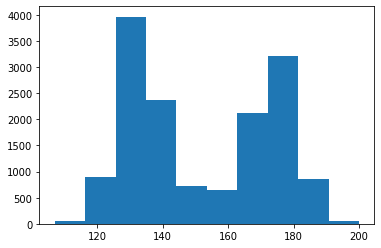

In [ ]:
from sklearn import datasets
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# iris = datasets.load_iris()
# df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])
# sns.heatmap(df.corr(), 
#             xticklabels=df.corr().columns.values,
#             yticklabels=df.corr().columns.values)
# plt.show()

print("This is the histogram of grayscale values of cell with y=", y[0])
plt.hist(X[0])

This is the histogram of grayscale values of cell with y= True


(array([  23.,   77.,   97.,  277., 1085., 3166., 1839., 3551., 4643.,
         129.]),
 array([ 52. ,  67.6,  83.2,  98.8, 114.4, 130. , 145.6, 161.2, 176.8,
        192.4, 208. ]),
 <a list of 10 Patch objects>)

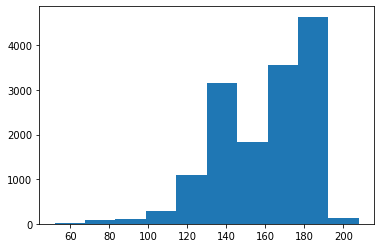

In [ ]:
print("This is the histogram of grayscale values of cell with y=", y[1])
plt.hist(X[1])

What we learned from this visualization is that the distribution of pixel grayscale values is different between infected and uninfected cells. We have just done a single image's histogram, because we do not see an obvious way of aggregating all image's values (averaging isn't a good idea because the location of the black (infected) part moves around, and over several images, would average out to grey. We also note that our uninfected cells have a greater number of darker pixels (towards 0) on our greyscale than our infected. This was unexpected an may explain part of the problems that we later see in our models precdictions.

That healthy cell looks like this


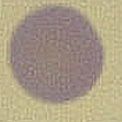

In [ ]:
print("That healthy cell looks like this")
original_images[700]

And in grayscale i.e. what the model sees


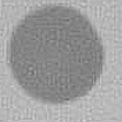

In [ ]:
print("And in grayscale i.e. what the model sees")
ImageOps.grayscale(original_images[700])

This (infected) cell looks like this (note that our true features do not have color


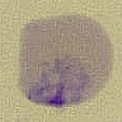

In [ ]:
print("This (infected) cell looks like this (note that our true features do not have color")
original_images[2]

And in grayscale i.e. what the model sees


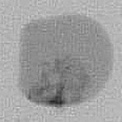

In [ ]:
print("And in grayscale i.e. what the model sees")
ImageOps.grayscale(original_images[2])

Correlation between the 3 added features and the label

In [ ]:
x_df.join(label_df)[["median", "3rd_q", "var", "infected (Y/N)"]].corr()

median     3rd_q       var  infected (Y/N)
median          1.000000  0.937751 -0.863472        0.179983
3rd_q           0.937751  1.000000 -0.828256        0.183704
var            -0.863472 -0.828256  1.000000       -0.145119
infected (Y/N)  0.179983  0.183704 -0.145119        1.000000

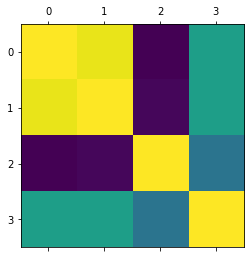

In [ ]:
plt.matshow(x_df.join(label_df)[["median", "3rd_q", "var", "infected (Y/N)"]].corr())

In [ ]:
y = np.array(y)
# y

In [ ]:
[images[:10], y[:10]]

[['RBC_single1.jpg',
  'RBC_single2.jpg',
  'RBC_single3.jpg',
  'RBC_single5.jpg',
  'RBC_single6.jpg',
  'RBC_single7.jpg',
  'RBC_single8.jpg',
  'RBC_single9.jpg',
  'RBC_single10.jpg',
  'RBC_single11.jpg'],
 array([False,  True,  True, False,  True,  True, False, False,  True,
         True])]

In [ ]:
# y = np.delete(y, 6) # TODO we forgot to add image #6, sorry about that :)

In [ ]:
from sklearn.model_selection import train_test_split 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'Training examples: {X_train.shape[0]}\nTesting examples{ {X_test.shape[0]}}')

Training examples: 672
Testing examples{224}


Now, we'll save your train and test sets. Together, these four files will make up the dataset you submit on Gradescope. 

In [ ]:
import numpy as np 

np.savetxt("X_train.csv", X_train, delimiter=",")
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

# zip together all components of your dataset
!zip homework1_dataset.zip X_train.csv X_test.csv y_train.csv y_test.csv

updating: X_train.csv (deflated 95%)
updating: X_test.csv (deflated 95%)
updating: y_train.csv (deflated 98%)
updating: y_test.csv (deflated 98%)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f'Decision Tree model accuracy is {accuracy}')

Decision Tree model accuracy is 0.6651785714285714


In [ ]:
# # If you have a classification problem, here is how to train a Logistic Regression classifier

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print(f'Logistic Regression model accuracy is {accuracy}')

# # If you have a regression problem, here is how to train a Linear Regression classifier

# from sklearn.linear_model import LinearRegression

# reg = LinearRegression().fit(X_train, y_train)
# y_hat = reg.predict(X_test)
# r_squared = reg.score(X_test, y_test)
# print(f'Goodness of fit given by coefficient of determination is {r_squared}')

#######################################################
# TODO: Train at least one simple supervised learning algorithm on your dataset

#######################################################

Logistic Regression model accuracy is 0.6875


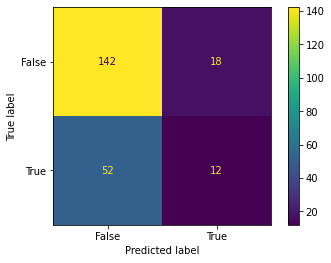

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

We're evaluating our Logistic Regression model. Model accuracy is pretty bad, only 68% for LogReg and 66% for Decision Tree. More bad news - as we see from the confusion matrix on the test set above, LogReg has learned to predict False most of the time. Remember that we have a class imbalance, so always "predicting" False will still get 75% accuracy

More feature engineering and a better model is needed to get good performance. For example, we need to deal with shift invariance by using a sliding window/Convolution. As it stands, by vectorizing the image, we are spreading far away the areas that are above one-another in pixels.

In addition, adding more training data will likely help our performance, as our data set is still relatively small at 896.

# Ariel Field Image Segmentation for Project

## No longer necessary to run!! Skip directly to NN-Unet - Reimplement K-Means clustering from HW5 lab to generate labels

Can also load directly from .npy file. see np.load() call below and skip running K-Means

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os

In [ ]:
field_microscope_img_path = r"/content/drive/MyDrive/RBC_images"

09.09 transf1.jpg
This is what the data (one image bcs. I cannot get more to print) looks like


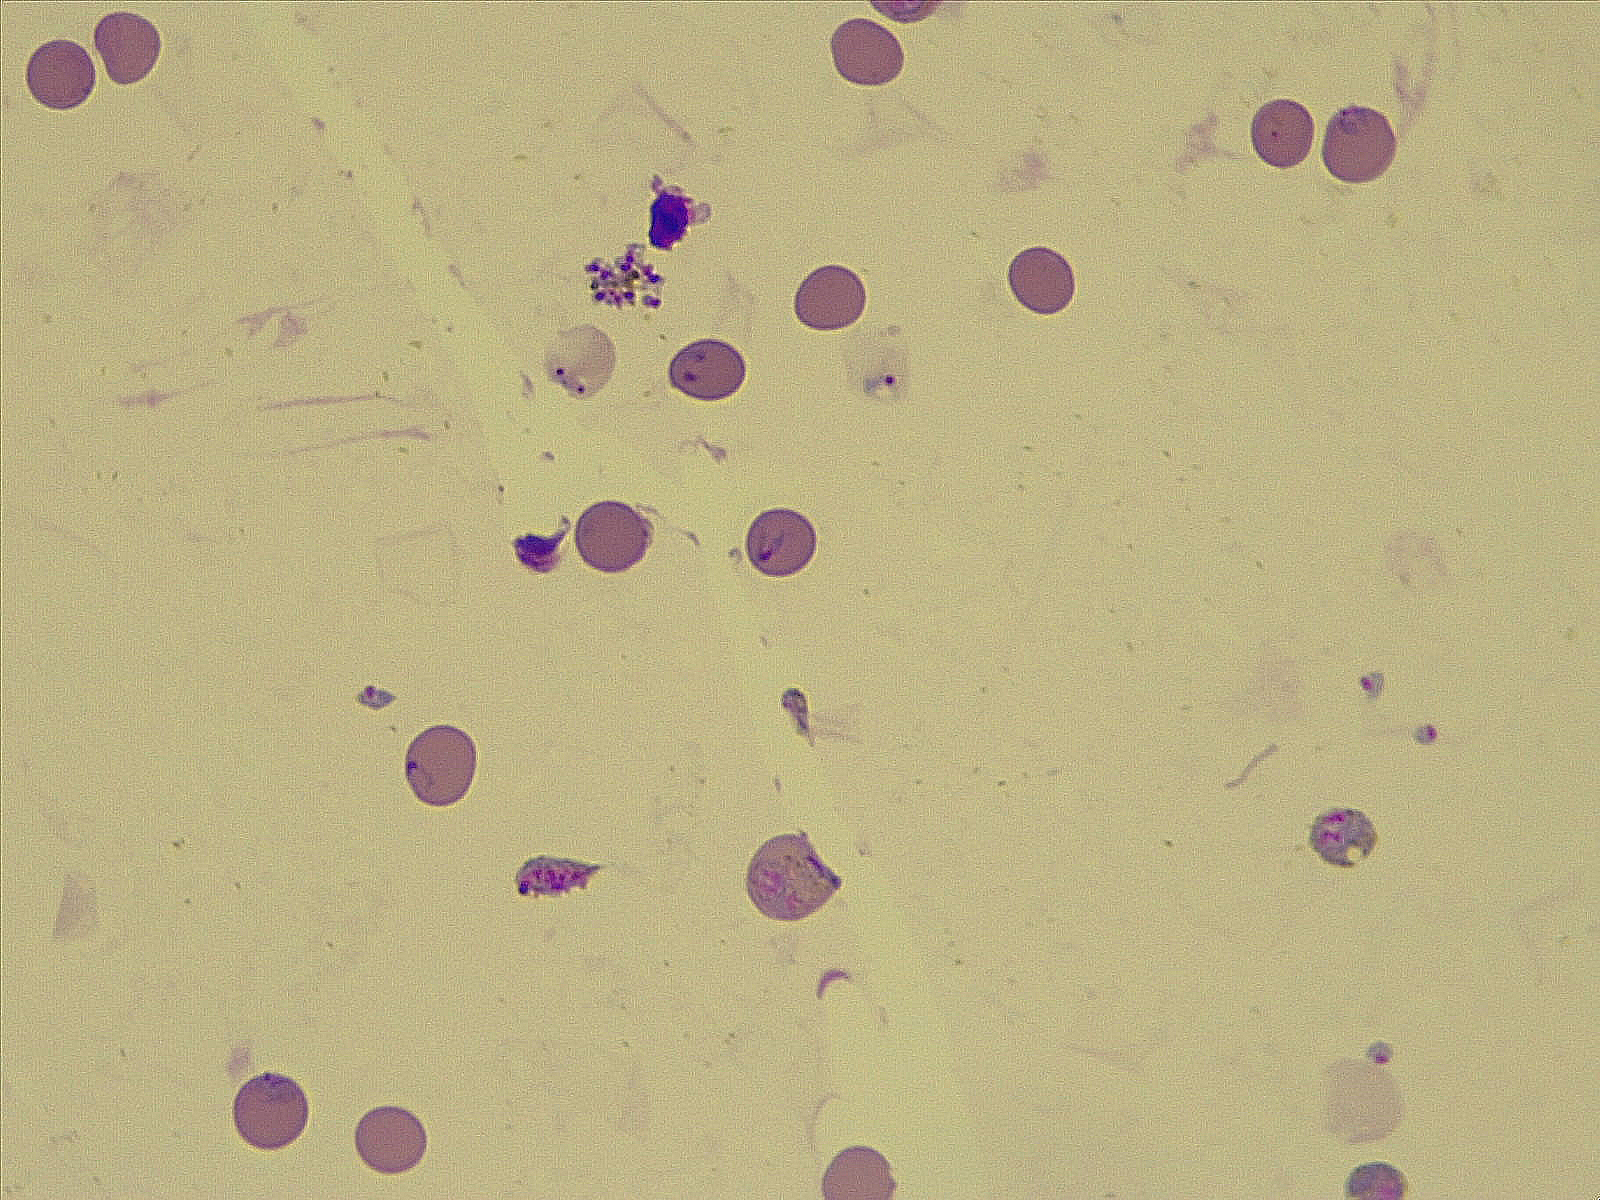

In [ ]:
# Suppose you have a directory called images that contains pictures of cats, you can process them as follows:
from PIL import Image


field_mic_images = [f for f in os.listdir(field_microscope_img_path) if os.path.isfile(os.path.join(field_microscope_img_path, f)) and f.endswith(".jpg")]
print(field_mic_images[0])
field_mic_images = [Image.open(field_microscope_img_path + "/" + image) for image in field_mic_images] # Load images
# X is a list of PIL Image objects

print("This is what the data (one image bcs. I cannot get more to print) looks like")
field_mic_images[20]

In [ ]:
color_image = field_mic_images[20]
grayscale_image = ImageOps.grayscale(color_image)

from sklearn.cluster import KMeans
import random
import numpy as np

image_mat = np.asarray(grayscale_image)

random.seed(42)
### TODO: run KMeans clustering here
data = image_mat.reshape(image_mat.shape[0] * image_mat.shape[1],1)
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data)

KMeans(n_clusters=2)

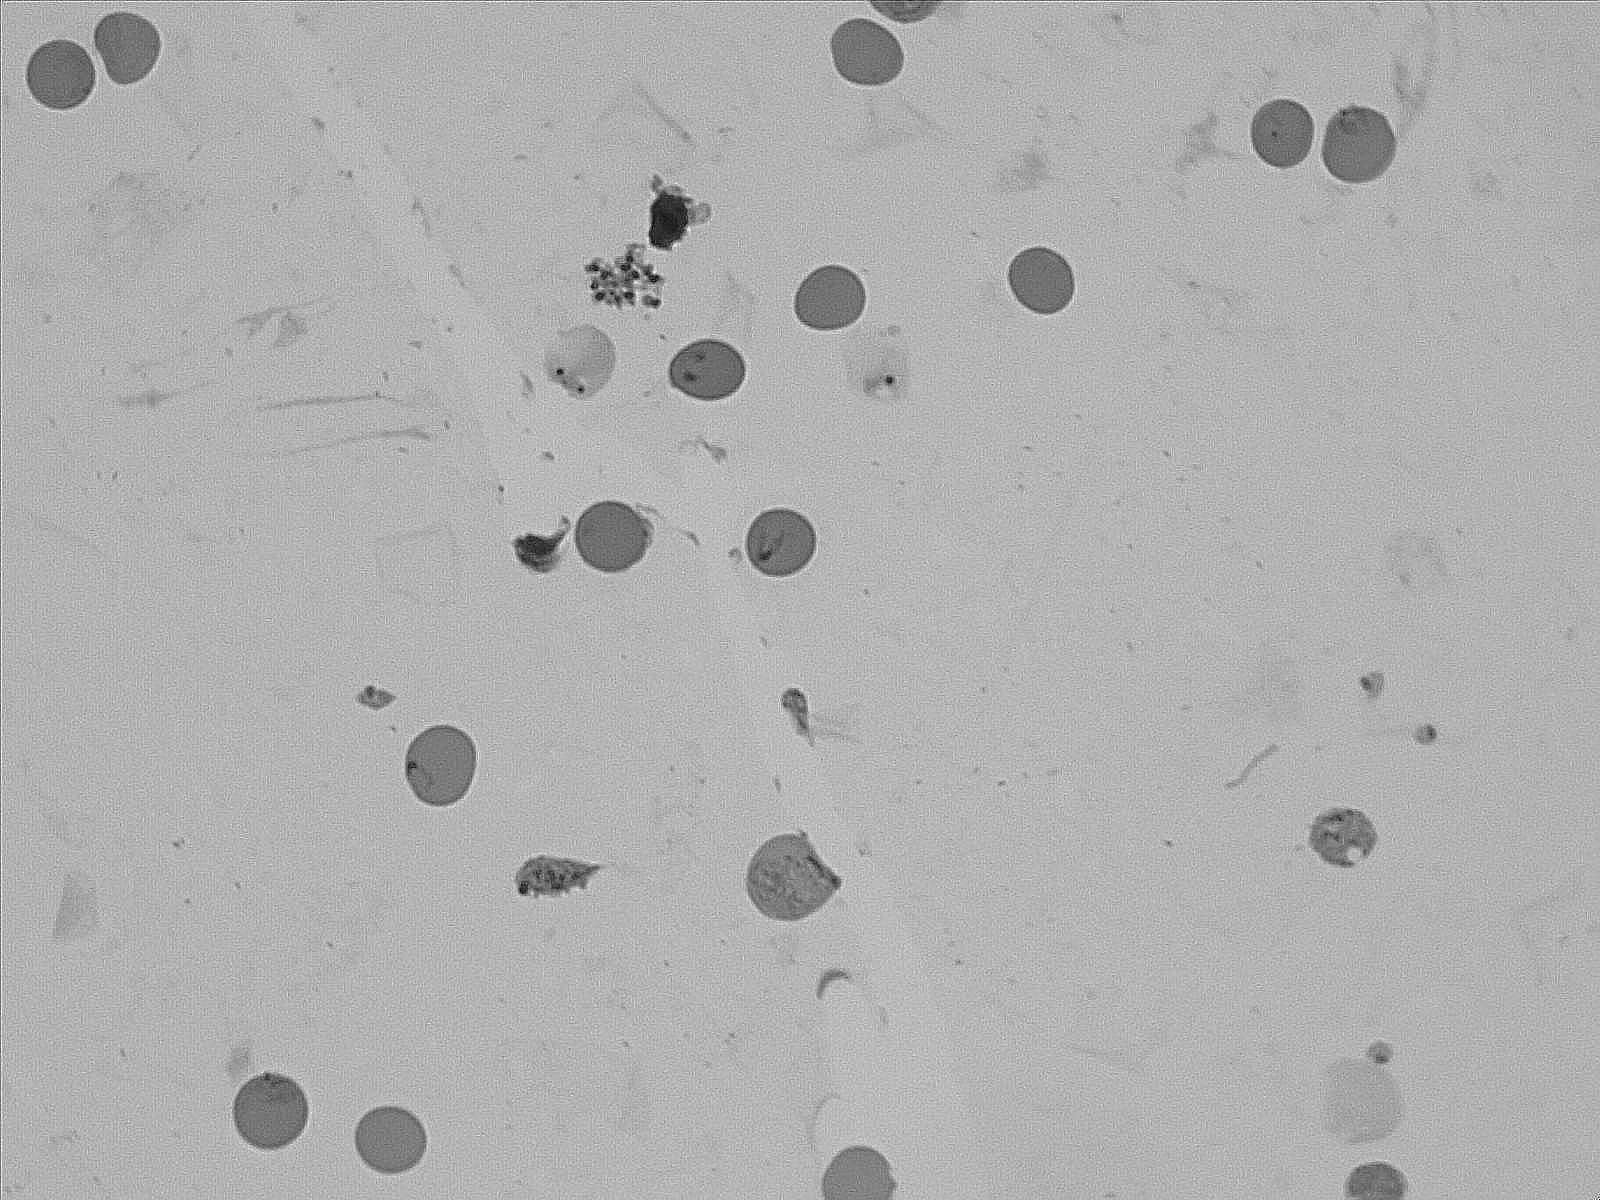

In [ ]:
grayscale_image

K-means clustered image

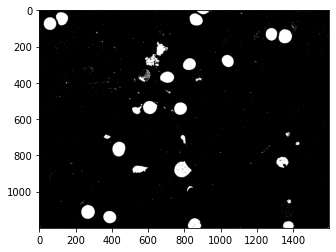

In [ ]:
plt.imshow(kmeans.labels_.reshape(image_mat.shape), cmap="gray")

#### As we can see, the performance from K-means is quite promising as a ground-label

In [ ]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 1], dtype=int32)

In [ ]:
kmeans.labels_.shape

(1920000,)

In [ ]:
# Each label above corresponds to each pixel
np.asarray(grayscale_image)[:].shape[0] * np.asarray(grayscale_image)[:].shape[1]

1920000

#### Running KMeans clustering on all images to generate labels

In [ ]:
# This can take a few minutes - running KMeans(2) on every image
field_image_labels = []



for image in field_mic_images:
    grayscale_image = ImageOps.grayscale(image)
    image_mat = np.asarray(grayscale_image)
    data = image_mat.reshape(image_mat.shape[0] * image_mat.shape[1],1)
    kmeans = KMeans(n_clusters = 2)
    kmeans.fit(data)
    field_image_labels.append(kmeans.labels_)

# field_image_labels

KeyboardInterrupt: ignored

In [ ]:
field_image_labels = np.array(field_image_labels, dtype=np.bool8)

In [ ]:
plt.imshow(field_image_labels[5].reshape(image_mat.shape), cmap="gray")

#### Problem: Kmeans tends to get the labels sometimes correct and sometimes inverse - cells can be either black or white

Solution: observe that most of the image is background. Get Mean of image. If mean is ~1, that means background is white and we need to flip. Else, background is black and cells are white, which is what we want

In [ ]:
np.mean(field_image_labels[77])

In [ ]:
# Invert colors if background is white - KMeans got wrong label

for i in range(len(field_image_labels)):
    if np.mean(field_image_labels[i]) > 0.6:
        field_image_labels[i] = np.invert(field_image_labels[i])

In [ ]:
np.mean(field_image_labels[77])

In [ ]:
# Save the above array to file so we don't need to wait 5min for KMeans
# np.save("/content/drive/MyDrive/RBC_images/KMeansLabels", field_image_labels)

field_image_labels = np.load("/content/drive/MyDrive/RBC_images/KMeansLabels.npy")

In [ ]:
from sys import getsizeof
print("Memory footprint of labels: ", round(getsizeof(field_image_labels) / 1024 / 1024,2), "MB")

Memory footprint of labels:  309.45 MB


#### NN-UNet wants us to save the images in a certain folder structure

In [ ]:
for i in range(len(field_image_labels)):
    plt.imsave("/content/drive/MyDrive/RBC_images/training/output/img-"+str(i)+".png", field_image_labels[i].reshape(image_mat.shape), cmap="gray", format="png", pil_kwargs={"compress_level":0})

In [ ]:
# Save input images with a nn-Unet friendly name. Not needed anymore
for i in range(len(field_mic_images)):
    field_mic_images[i].save("/content/drive/MyDrive/RBC_images/training/input/img-"+str(i)+".png", "PNG", compress_level=0)

## Install nn-unet - https://www.nature.com/articles/s41592-020-01008-z

In [ ]:
# Mounting Google Drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# See GPU info - GPU necessary for NN-Unet
!nvidia-smi

Fri Apr 29 17:14:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    24W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Verify latest torch-CUDA is installed, as per https://github.com/MIC-DKFZ/nnUNet#installation
# !pip list

In [ ]:
!pip install nnunet

     |████████████████████████████████| 251 kB 11.9 MB/s 
     |████████████████████████████████| 151 kB 50.4 MB/s 
     |████████████████████████████████| 57 kB 4.5 MB/s 
     |████████████████████████████████| 48.4 MB 2.6 MB/s 
     |████████████████████████████████| 96 kB 4.9 MB/s 
     |████████████████████████████████| 2.0 MB 45.8 MB/s 
  Created wheel for nnunet: filename=nnunet-1.7.0-py3-none-any.whl size=487821 sha256=7d0f0e9ed5a12f3ffbcadbef2244d6232df1cf7f3760749cfcc13a0f279eecf8
  Stored in directory: /root/.cache/pip/wheels/66/f6/19/c51389976a9ae30212178d1c41497893504b900f043fe1c665
  Created wheel for batchgenerators: filename=batchgenerators-0.23-py3-none-any.whl size=84779 sha256=118473a64b28be53e43ab88540bf2c398af9ed802aa462ec94c9601c88692cef
  Stored in directory: /root/.cache/pip/wheels/81/3d/a2/9a602ce56458c684d2962ec89eddd6bc06b00687735e2dd11a
  Created wheel for dicom2nifti: filename=dicom2nifti-2.3.3-py3-none-any.whl size=44349 sha256=5534a4e85f0d71f2473d7e459e912

#### Set up Env_vars for NN-Unet according to https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/setting_up_paths.md


In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os
import numpy as np

#### Generate dataset.json - needed for NN-Unet

In [ ]:
# Again massage data to fit nn-Unet
field_image_labels = np.load("/content/drive/MyDrive/RBC_images/KMeansLabels.npy")
field_image_labels = field_image_labels.astype(np.uint32)
# field_image_labels[field_image_labels==1] = 255
field_image_labels

array([[0, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1]], dtype=uint32)

In [ ]:
# field_image_labels = [field_image_labels[i].reshape(image_mat.shape)]

In [ ]:
# from PIL import Image, ImageOps
# import matplotlib.pyplot as plt
# import os

# inference_field_microscope_img_path = r"/content/drive/MyDrive/RBC_images/try_inference"


# field_mic_images = [f for f in os.listdir(inference_field_microscope_img_path) if os.path.isfile(os.path.join(inference_field_microscope_img_path, f)) and f.endswith(".jpg")]
# # print(field_mic_images[0])
# field_mic_images = [Image.open(inference_field_microscope_img_path + "/" + image) for image in field_mic_images] # Load images
# # X is a list of PIL Image objects

# print("This is what the data (one image bcs. I cannot get more to print) looks like")
# field_mic_images[5]

In [ ]:
# %env nnUNet_raw_data_base=/content/drive/MyDrive/RBC_images
# %env nnUNet_preprocessed=/content/drive/MyDrive/RBC_images/nnUNet_preprocessed
# %env RESULTS_FOLDER=/content/drive/MyDrive/RBC_images/nnUNet_trained_models

# For creating and running on inference data
%env nnUNet_raw_data_base=/content/drive/MyDrive/RBC_images/try_inference
%env nnUNet_preprocessed=/content/drive/MyDrive/RBC_images/try_inference/nnUNet_preprocessed
%env RESULTS_FOLDER=/content/drive/MyDrive/RBC_images/try_inference/nnUNet_trained_models

env: nnUNet_raw_data_base=/content/drive/MyDrive/RBC_images/try_inference
env: nnUNet_preprocessed=/content/drive/MyDrive/RBC_images/try_inference/nnUNet_preprocessed
env: RESULTS_FOLDER=/content/drive/MyDrive/RBC_images/try_inference/nnUNet_trained_models


#### The following cell converts PNG/numpy array images into Image Segmentation format used by NN-Unet. PLEASE DO NOT RUN WITHOUT TALKING TO ARIEL. Took a lot of effort to fix

In [ ]:
# import numpy as np
# from batchgenerators.utilities.file_and_folder_operations import *
# from nnunet.dataset_conversion.utils import generate_dataset_json
# from nnunet.paths import nnUNet_raw_data, preprocessing_output_dir
# # from nnunet.utilities.file_conversions import convert_2d_image_to_nifti

# def convert_2d_image_to_nifti(input_filename: int, output_filename_truncated: str, spacing=(999, 1, 1),
#                               transform=None, is_seg: bool = False) -> None:
#     from typing import Tuple, List, Union
#     from skimage import io
#     import SimpleITK as sitk
#     import numpy as np
#     import tifffile
#     """
#     Reads an image (must be a format that it recognized by skimage.io.imread) and converts it into a series of niftis.
#     The image can have an arbitrary number of input channels which will be exported separately (_0000.nii.gz,
#     _0001.nii.gz, etc for images and only .nii.gz for seg).
#     Spacing can be ignored most of the time.
#     !!!2D images are often natural images which do not have a voxel spacing that could be used for resampling. These images
#     must be resampled by you prior to converting them to nifti!!!
#     Datasets converted with this utility can only be used with the 2d U-Net configuration of nnU-Net
#     If Transform is not None it will be applied to the image after loading.
#     Segmentations will be converted to np.uint32!
#     :param is_seg:
#     :param transform:
#     :param input_filename:
#     :param output_filename_truncated: do not use a file ending for this one! Example: output_name='./converted/image1'. This
#     function will add the suffix (_0000) and file ending (.nii.gz) for you.
#     :param spacing:
#     :return:
#     """
#     if is_seg:
#         # img = io.imread(input_filename)
#         img = field_image_labels[input_filename]
#         img = img.reshape(image_mat.shape)
#         # print("img label", img.shape)
#     else:
#         # img = io.imread(input_filename, as_gray=True)
#         img = np.asarray(field_mic_images[input_filename])
#         # print("img color", img.shape)
#         # print(img)

#     if transform is not None:
#         img = transform(img)

#     if len(img.shape) <= 2:  # 2d image with no color channels
#         img = img[None, None]  # add dimensions
#     else:
#         assert len(img.shape) == 3, "image should be 3d with color channel last but has shape %s" % str(img.shape)
#         # we assume that the color channel is the last dimension. Transpose it to be in first
#         img = img.transpose((2, 0, 1))
#         # add third dimension
#         img = img[:, None]

#     print("i: ", input_filename)

#     # image is now (c, x, x, z) where x=1 since it's 2d
#     if is_seg:
#         # print("Imshape: ", img.shape)
#         assert img.shape[0] == 1, 'segmentations can only have one color channel, not sure what happened here'

#     for j, i in enumerate(img):

#         if is_seg:
#             i = i.astype(np.uint32)

#         itk_img = sitk.GetImageFromArray(np.array(i))
#         itk_img.SetSpacing(list(spacing)[::-1])
#         if not is_seg:
#             sitk.WriteImage(itk_img, output_filename_truncated + "_%04.0d.nii.gz" % j)
#         else:
#             sitk.WriteImage(itk_img, output_filename_truncated + ".nii.gz")

# if __name__ == '__main__':
#     """
#     nnU-Net was originally built for 3D images. It is also strongest when applied to 3D segmentation problems because a 
#     large proportion of its design choices were built with 3D in mind. Also note that many 2D segmentation problems, 
#     especially in the non-biomedical domain, may benefit from pretrained network architectures which nnU-Net does not
#     support.
#     Still, there is certainly a need for an out of the box segmentation solution for 2D segmentation problems. And 
#     also on 2D segmentation tasks nnU-Net cam perform extremely well! We have, for example, won a 2D task in the cell 
#     tracking challenge with nnU-Net (see our Nature Methods paper) and we have also successfully applied nnU-Net to 
#     histopathological segmentation problems. 
#     Working with 2D data in nnU-Net requires a small workaround in the creation of the dataset. Essentially, all images 
#     must be converted to pseudo 3D images (so an image with shape (X, Y) needs to be converted to an image with shape 
#     (1, X, Y). The resulting image must be saved in nifti format. Hereby it is important to set the spacing of the 
#     first axis (the one with shape 1) to a value larger than the others. If you are working with niftis anyways, then 
#     doing this should be easy for you. This example here is intended for demonstrating how nnU-Net can be used with 
#     'regular' 2D images. We selected the massachusetts road segmentation dataset for this because it can be obtained 
#     easily, it comes with a good amount of training cases but is still not too large to be difficult to handle.
#     """

#     # download dataset from https://www.kaggle.com/insaff/massachusetts-roads-dataset
#     # extract the zip file, then set the following path according to your system:
#     base = '/content/drive/MyDrive/RBC_images/try_inference'
#     # this folder should have the training and testing subfolders

#     # now start the conversion to nnU-Net:
#     task_name = ''
#     target_base = join(base, task_name)
#     target_imagesTr = join(target_base, "imagesTr")
#     target_imagesTs = join(target_base, "imagesTs")
#     target_labelsTs = join(target_base, "labelsTs")
#     target_labelsTr = join(target_base, "labelsTr")

#     maybe_mkdir_p(target_imagesTr)
#     maybe_mkdir_p(target_labelsTs)
#     maybe_mkdir_p(target_imagesTs)
#     maybe_mkdir_p(target_labelsTr)

#     # convert the training examples. Not all training images have labels, so we just take the cases for which there are
#     # labels
#     labels_dir_tr = join(base, 'training', 'output')
#     images_dir_tr = join(base, 'training', 'input')
#     # training_cases = subfiles(labels_dir_tr, suffix='.png', join=False)
#     # print(training_cases)
#     i = 0
#     j = 0
#     # for t in range(137):
#     #     # unique_name = t[:-4]  # just the filename with the extension cropped away, so img-2.png becomes img-2 as unique_name
#     #     # input_segmentation_file = join(labels_dir_tr, t)
#     #     # input_image_file = join(images_dir_tr, t)

#     #     output_image_file = join(target_imagesTr, "img-" + str(i))  # do not specify a file ending! This will be done for you
#     #     output_seg_file = join(target_labelsTr, "img-" + str(i))  # do not specify a file ending! This will be done for you

#     #     # this utility will convert 2d images that can be read by skimage.io.imread to nifti. You don't need to do anything.
#     #     # if this throws an error for your images, please just look at the code for this function and adapt it to your needs
#     #     convert_2d_image_to_nifti(i, output_image_file, is_seg=False)

#     #     # the labels are stored as 0: background, 255: road. We need to convert the 255 to 1 because nnU-Net expects
#     #     # the labels to be consecutive integers. This can be achieved with setting a transform
#     #     convert_2d_image_to_nifti(i, output_seg_file, is_seg=True)
#     #     i += 1

#     # now do the same for the test set
#     labels_dir_ts = join(base, 'testing', 'output')
#     images_dir_ts = join(base, 'testing', 'input')
#     # testing_cases = subfiles(labels_dir_ts, suffix='.png', join=False)
#     # for ts in range(138, 169):
#     #     # unique_name = ts[:-4]
#     #     # input_segmentation_file = join(labels_dir_ts, ts)
#     #     # input_image_file = join(images_dir_ts, ts)

#     #     output_image_file = join(target_imagesTs, "img-"+str(j))
#     #     output_seg_file = join(target_labelsTs, "img-"+str(j))

#     #     convert_2d_image_to_nifti(j, output_image_file, is_seg=False)
#     #     convert_2d_image_to_nifti(j, output_seg_file, is_seg=True)
#     #     j += 1

#     for inference_img in range(11): # Convert inference imgs to format NN-Unet likes
#         # unique_name = ts[:-4]
#         # input_segmentation_file = join(labels_dir_ts, ts)
#         # input_image_file = join(images_dir_ts, ts)

#         # output_image_file = join(target_imagesTs, "img-"+str(j))
#         # output_seg_file = join(target_labelsTs, "img-"+str(j))

#         convert_2d_image_to_nifti(j, "/content/drive/MyDrive/RBC_images/try_inference/img-"+str(j), is_seg=False)
#         # convert_2d_image_to_nifti(j, output_seg_file, is_seg=True)
#         j += 1

#     # finally we can call the utility for generating a dataset.json
#     # generate_dataset_json(join(target_base, 'dataset.json'), target_imagesTr, target_imagesTs, ('Red', 'Green', 'Blue'),
#                         #   labels={0: 'background', 1: 'street'}, dataset_name=task_name, license='hands off!')

#     """
#     once this is completed, you can use the dataset like any other nnU-Net dataset. Note that since this is a 2D
#     dataset there is no need to run preprocessing for 3D U-Nets. You should therefore run the 
#     `nnUNet_plan_and_preprocess` command like this:
    
#     > nnUNet_plan_and_preprocess -t 120 -pl3d None
    
#     once that is completed, you can run the trainings as follows:
#     > nnUNet_train 2d nnUNetTrainerV2 120 FOLD
    
#     (where fold is again 0, 1, 2, 3 and 4 - 5-fold cross validation)
    
#     there is no need to run nnUNet_find_best_configuration because there is only one model to choose from.
#     Note that without running nnUNet_find_best_configuration, nnU-Net will not have determined a postprocessing
#     for the whole cross-validation. Spoiler: it will determine not to run postprocessing anyways. If you are using
#     a different 2D dataset, you can make nnU-Net determine the postprocessing by using the
#     `nnUNet_determine_postprocessing` command
#     """

i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
i:  10


In [ ]:
# Do not run this again!!
# !nnUNet_plan_and_preprocess -t 555 --verify_dataset_integrity

#### Finally, let's train

In [ ]:
!nnUNet_train -h



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

usage: nnUNet_train [-h] [-val] [-c] [-p P] [--use_compressed_data]
                    [--deterministic] [--npz] [--find_lr] [--valbest] [--fp32]
                    [--val_folder VAL_FOLDER] [--disable_saving]
                    [--disable_postprocessing_on_folds]
                    [--val_disable_overwrite] [--disable_next_stage_pred]
                    [-pretrained_weights PRETRAINED_WEIGHTS]
                    network network_trainer task fold

positional arguments:
  network
  network_trainer
  task                  can be task name or task id
  fold                  0, 1, ..., 5 or 'all'

optional arguments:
  -h, --hel

In [ ]:
!nnUNet_train 2d nnUNetTrainerV2 Task555_RBCImages 3



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2.nnUNetTrainerV2'>
For that I will be using the following configuration:
num_classes:  1
modalities:  {0: 'Red', 1: 'Green', 2: 'Blue'}
use_mask_for_norm OrderedDict([(0, False), (1, False), (2, False)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT'), (1, 'nonCT'), (2, 'nonCT')])
stages...

stage:  0
{'batch_size': 2, 'num_pool_per_axis': [8, 8], 'patch_size': array([1024, 1280]), 'med

In [ ]:
# color saturation

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0-3
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            25G        3.7G         12G        1.2M        9.3G         21G
Swap:            0B          0B          0B


#### Do Inference

In [ ]:
!nnUNet_predict -i "/content/drive/MyDrive/RBC_images/try_inference" -o "/content/drive/MyDrive/RBC_images/try_inference/predictions/" --folds 3 -t Task555_RBCImages -m 2d



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /content/drive/MyDrive/RBC_images/try_inference/nnUNet_trained_models/nnUNet/2d/Task555_RBCImages/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 3 input modalities for each image
Found 11 unique case ids, here are some examples: ['img-3' 'img-6' 'img-3' 'img-3' 'img-4' 'img-1' 'img-10' 'img-7' 'img-3'
 'img-1']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 11
number of cases that still need to be predicted: 11
emptying cuda cache
loading parameters for folds, [3]
using the following model files:  ['/content/drive/MyDrive/RBC_imag

##### Turn predicted segmentations back to PNG so we can view them - use ITK-SNAP program